# Imports

In [1]:
import numpy as np
from matplotlib import cm
import matplotlib.patches as mpatches
import proplot as pplt
import matplotlib as mpl
import proplot as pplt
import matplotlib.colors as mcolors
from itertools import cycle

pplt.rc['cmap.discrete'] = False
pplt.rc['pdf.fonttype'] = 42
pplt.rc['font.size'] = 8
pplt.rc['font.sans-serif'] = ['TeX Gyre Heros', 'sans-serif']
pplt.rc['mathtext.default'] = 'it'
pplt.rc['mathtext.fontset'] = 'custom'
pplt.rc['grid'] = False
mpl.style.use('seaborn-ticks')
dpi = 300

# load data

In [2]:
# full data
all_V_ABSs = np.load('all_V_ABSs.npy')
CNN_orig = np.load('CNN_orig_all.npy')
all_ratios = np.load('measurements_all.npy')

# test data
data_test = np.load('data_test.npy')

# GLL*GRR example images
G_corr = np.load('G_corr.npy')
G_corr_label = np.load('label_G_corr.npy')

# figure (part 1)

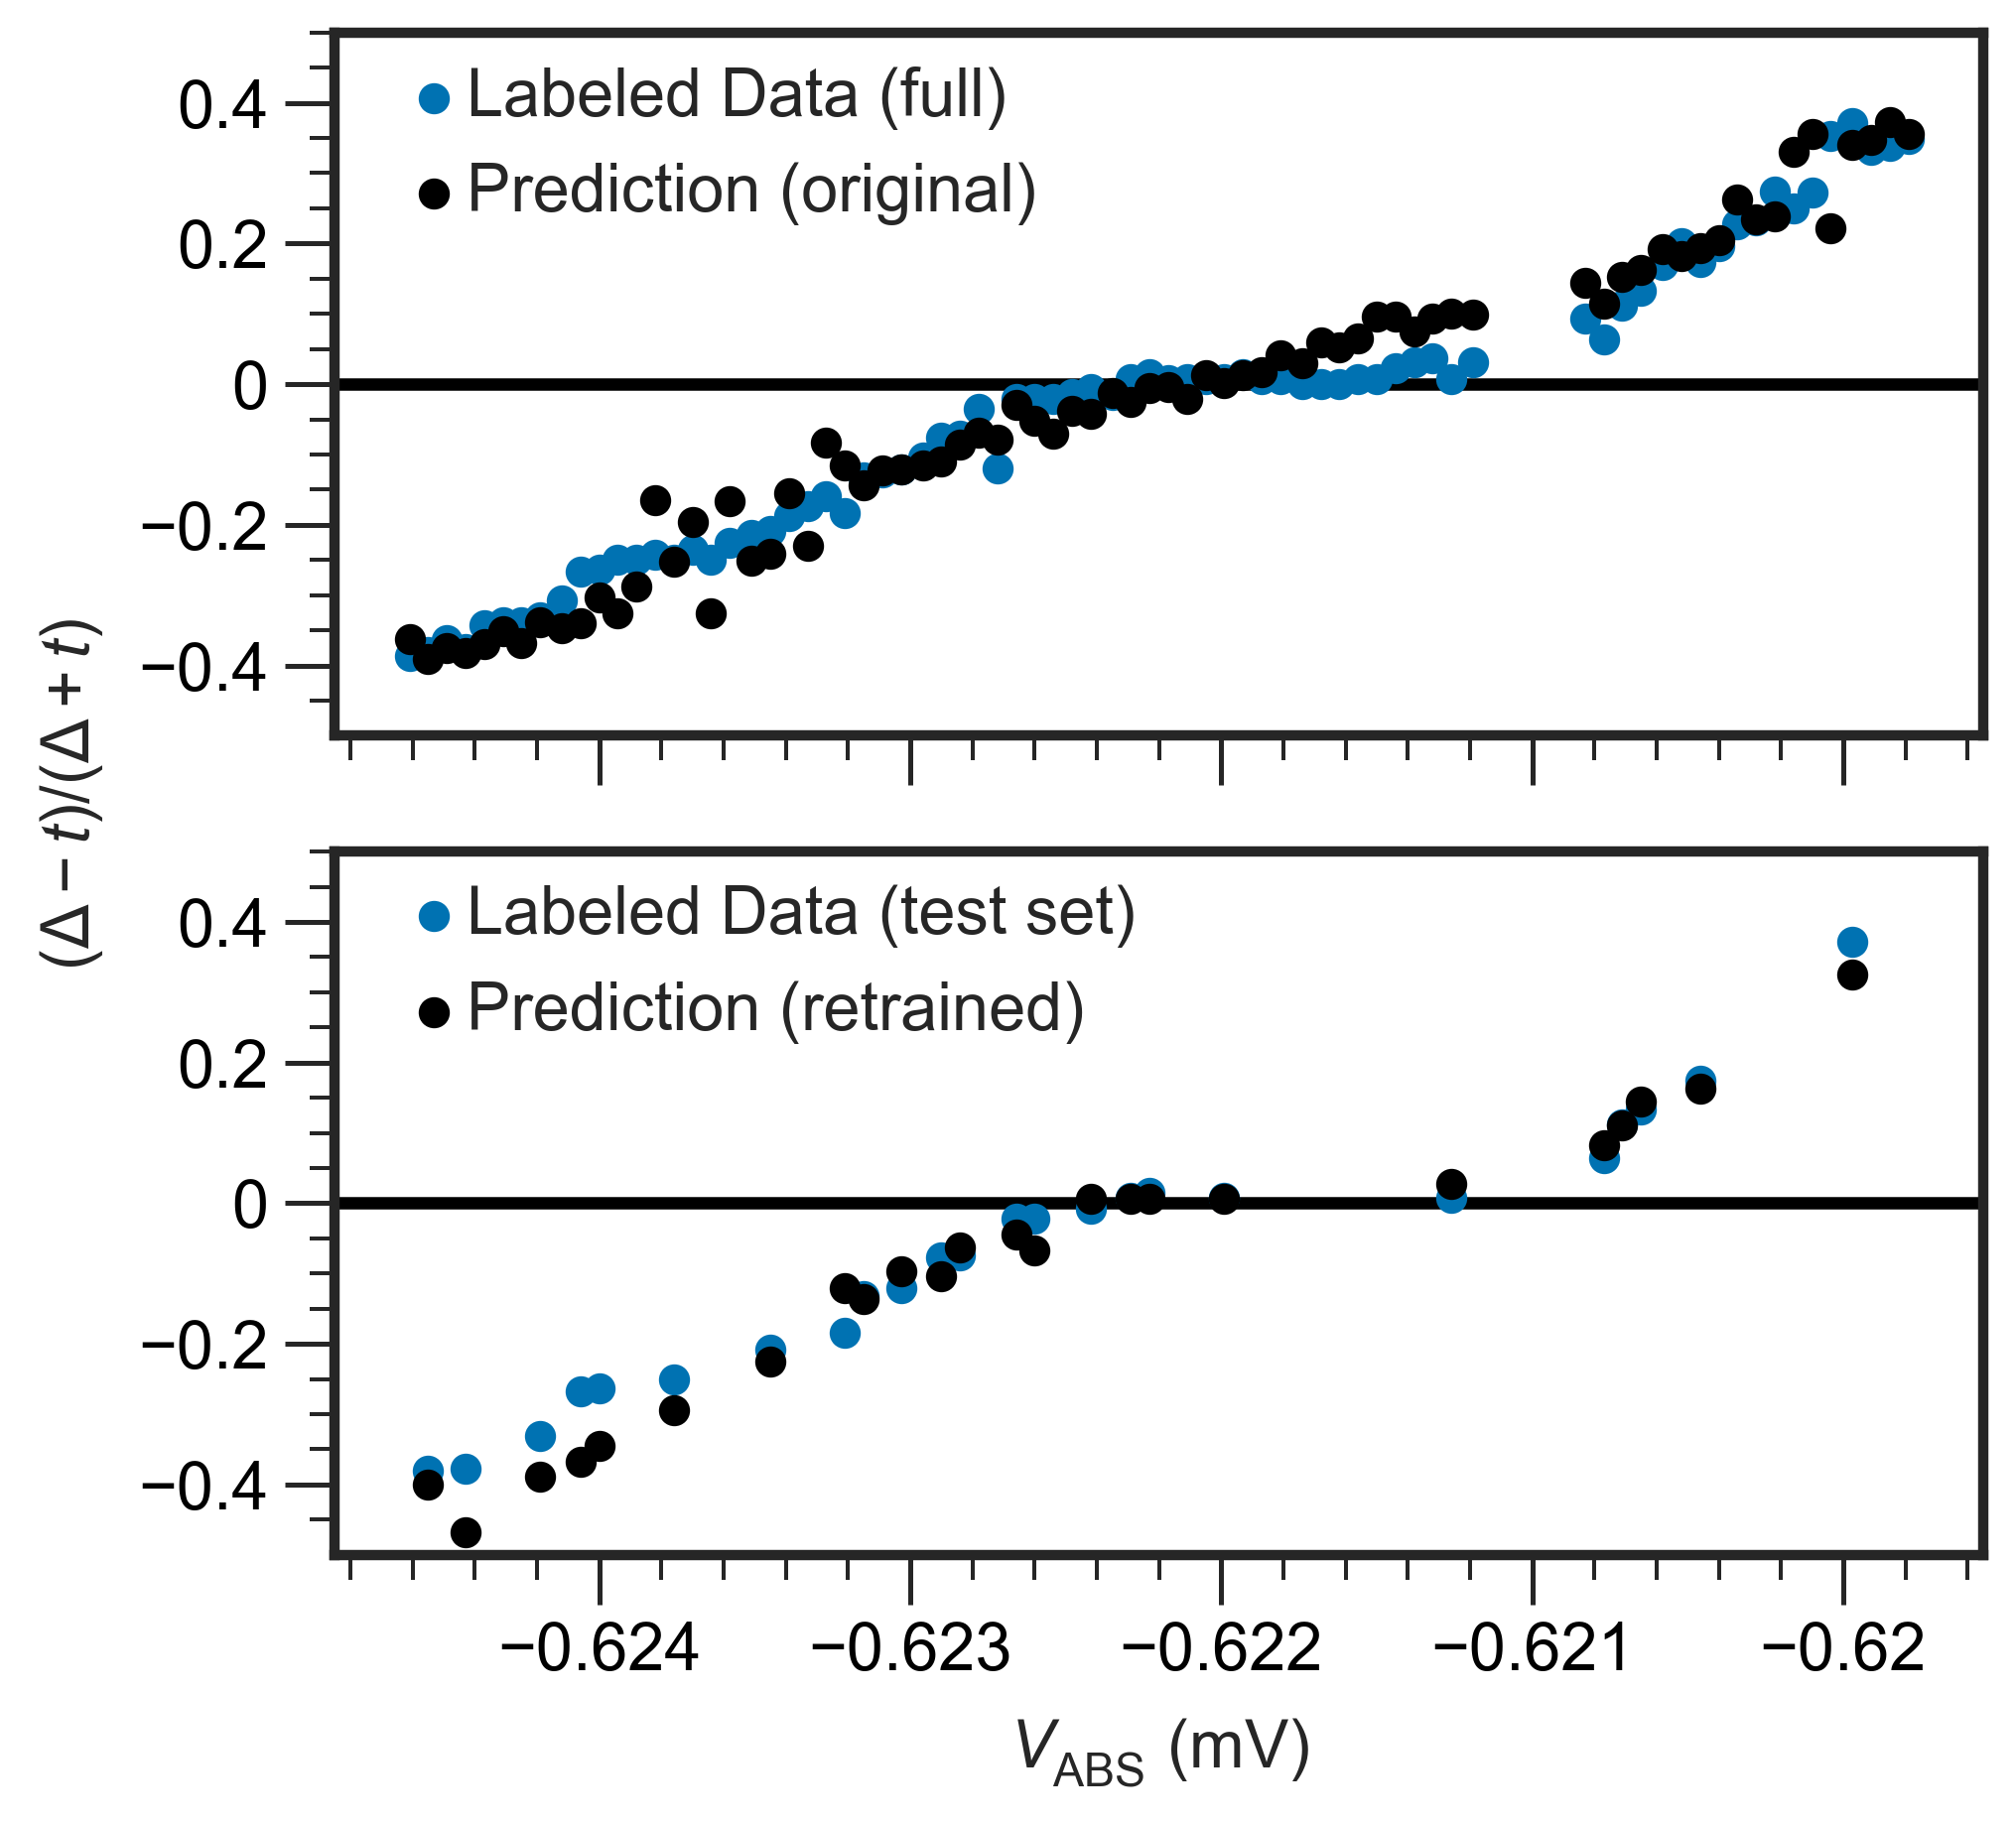

In [3]:
fig = pplt.figure(width='86mm', refheight='30mm', sharex=True, sharey=True, dpi=300)
axs = fig.subplots(nrows=2, ncols=1,ylim=[-0.5,0.5])
axs.format(xlabel=r'$V_\mathrm{ABS}$ (mV)', ylabel=r'$(\Delta-t)/(\Delta+t)$')
s = 10
#ratios_test = np.array(all_Delta_minus_t)[50:]/np.array(all_Delta_plus_t)[50:]
#ratios_all = np.array(all_Delta_minus_t)[:]/np.array(all_Delta_plus_t)[:]
leg_pad = -.5

ax = axs[0]
ax.scatter(all_V_ABSs, all_ratios, s=s, label='Labeled Data (full)')
ax.scatter(all_V_ABSs, CNN_orig, c='k', s=s, label='Prediction (original)')
ax.legend(ncols=1, handletextpad=leg_pad, loc='upper left')

ax = axs[1]
ax.scatter(data_test[:,2], data_test[:,1], s=s, label='Labeled Data (test set)')
ax.scatter(data_test[:,2], data_test[:,0], c='k', label='Prediction (retrained)', s=s)
ax.legend(ncols=1, handletextpad=leg_pad, loc='upper left')

for ax in axs:
    ax.axhline(0, zorder=-100, c='k')

pplt.show()

# figure (part 2)

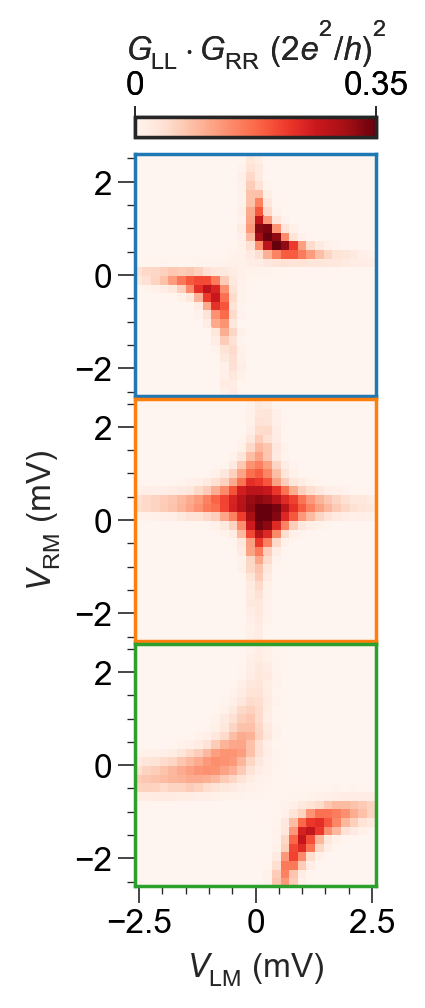

[-0.6201  -0.62235 -0.62364]


In [5]:
pplt.rc['cmap.discrete'] = False
pplt.rc['pdf.fonttype'] = 42
pplt.rc['font.size'] = 12
pplt.rc['font.sans-serif'] = ['TeX Gyre Heros', 'sans-serif']
pplt.rc['mathtext.default'] = 'it'
pplt.rc['mathtext.fontset'] = 'custom'
pplt.rc['grid'] = False
mpl.style.use('seaborn-ticks')
dpi = 300

fig = pplt.figure(width='54mm',sharex=True, sharey=True, wspace=2, hspace=0.1)
axs = fig.subplots(nrows=3,ncols=1)
local_max = 0.35
nonlocal_max = 0.1
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

X, Y = np.linspace(-2.5, 2.5, 28), np.linspace(-2.5, 2.5, 28)

i = 0
axL = axs[i,0]
pL = axL.pcolor(X, Y, G_corr[0,:,:], vmin=0, vmax=local_max, cmap='Reds')

for ax in [axL]:
    for spine in ax.spines.values():
        spine.set_color(colors[i])

i = 1
axL = axs[i,0]
pL = axL.pcolor(X, Y, G_corr[1,:,:], vmin=0, vmax=local_max, cmap='Reds')

for ax in [axL]:
    for spine in ax.spines.values():
        spine.set_color(colors[i])
                
i = 2
axL = axs[i,0]
pL = axL.pcolor(X, Y, G_corr[2,:,:], vmin=0, vmax=local_max, cmap='Reds')

for ax in [axL]:
    for spine in ax.spines.values():
        spine.set_color(colors[i])
        
        
axL.format(xlabel=r'$V_\mathrm{LM}$ (mV)')   
axs[1, 0].format(ylabel=r'$V_\mathrm{RM}$ (mV)', labelpad = 10)
cbarL = axs[0,0].colorbar(pL, loc='t', width=0.1, label=r'$G_\mathrm{LL} \cdot G_\mathrm{RR} \ (2e^2/h)^2$')
cbarL.set_ticks([0, .35])
pplt.show()

print(G_corr_label)